In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

In [109]:
dati = pd.read_csv ('dati.csv')

In [110]:
dati = dati[dati.elevazione == 20]
dati['data_ora'] = pd.to_datetime(dati.data_ora)

In [111]:
dati

,data_ora,rad,temperatura,elevazione
0,2022-12-23 02:45:48.120,5255,40.38,20.0
1,2022-12-23 02:45:48.323,5221,40.38,20.0
2,2022-12-23 02:45:48.542,5199,40.38,20.0
3,2022-12-23 02:45:48.745,5179,40.38,20.0
4,2022-12-23 02:45:48.948,5175,40.38,20.0
...,...,...,...,...
29877,2022-12-23 05:19:59.016,4863,40.32,20.0
29878,2022-12-23 05:19:59.219,4861,40.32,20.0
29879,2022-12-23 05:19:59.438,4849,40.29,20.0
29880,2022-12-23 05:19:59.672,4861,40.32,20.0


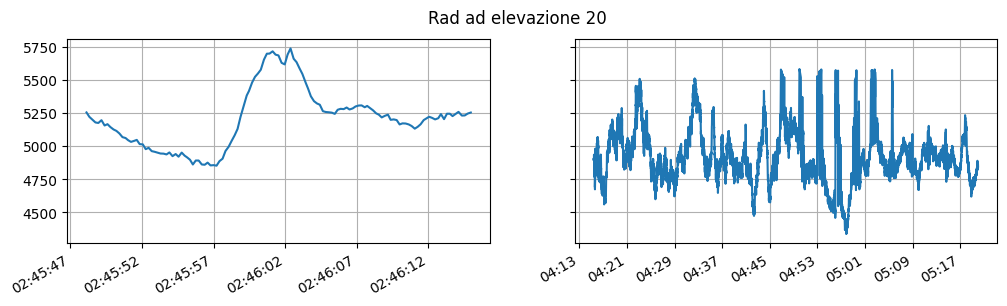

In [117]:
data_m = pd.to_datetime('2022-12-23 03:24:00', format = '%Y-%m-%d %H:%M:%S')

fig, axs = plt.subplots(1,2, sharey=True)
fig.suptitle('Rad ad elevazione 20')
fig.autofmt_xdate()
fig.set_size_inches(12, 3)

a_1 = dati.data_ora <= data_m
a_2 = dati.data_ora >= data_m

axs[0].plot(dati['data_ora'][a_1],dati['rad'][a_1], label='temp')
axs[0].xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
axs[0].xaxis.set_major_locator(SecondLocator(interval = 5))
axs[0].grid()

axs[1].plot(dati['data_ora'][a_2],dati['rad'][a_2], label='temp')
axs[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(MinuteLocator(interval = 8))
axs[1].grid()

plt.show()

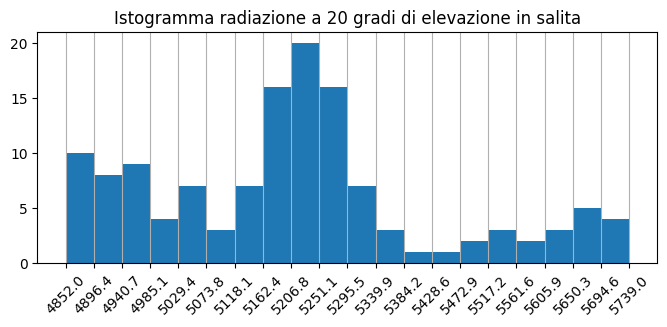

In [113]:
fig_1 = plt.figure(figsize=(8,3))
n, bins, patches = plt.hist(dati['rad'][a_1], bins=20)
plt.xticks(bins)
plt.xticks(rotation = 45)
plt.gca().xaxis.grid(True)
plt.title('Istogramma radiazione a 20 gradi di elevazione in salita')
plt.show()

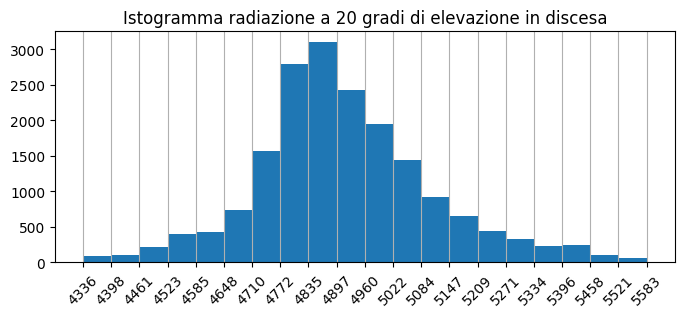

In [116]:
fig_2 = plt.figure(figsize=(8,3))
n, bins, patches = plt.hist(dati['rad'][a_2], bins=20)
plt.xticks(bins)
plt.xticks(rotation = 45)
plt.gca().xaxis.grid(True)
plt.title('Istogramma radiazione a 20 gradi di elevazione in discesa')
plt.show()

In [115]:
for x in dati[a_2].index:
    if dati['rad'][x] > 5583:
        dati = dati.drop(labels=x, axis=0)